In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go

# Importing required libraries for data visualization and analysis

import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importing required Plotly libraries for creating interactive plots


# 1. Data Collecting

## 1.1 Importing the dataset from a CSV file


In [101]:
# Load the CSV file into a pandas dataframe
df = pd.read_csv(r"C:\Users\faizb\OneDrive\Bureau\dataset\global air pollution dataset.csv")

# Get the shape of the dataframe (number of rows, number of columns)
df.shape

(23463, 12)

In [3]:
#Display the first 5 rows of the dataframe


df.head(5) 

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


# 2. Data Analysis

In [4]:
#Checking of Missing or Null value in dataset:

df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

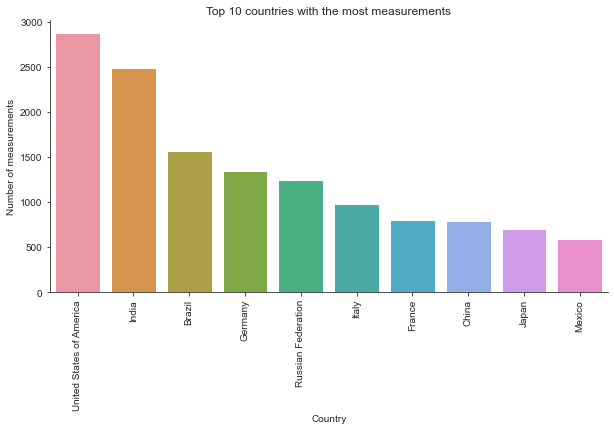

In [102]:
# Get a count of measurements by country
country_counts = df['Country'].value_counts()

# Get the top 10 countries with the highest number of measurements
top_countries = country_counts.head(10)

# Set the figure size and plot a bar chart of the top 10 countries
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the x and y axis labels and the plot title
plt.xlabel('Country')
plt.ylabel('Number of measurements')
plt.title('Top 10 countries with the most measurements')

# Remove the top and right spines of the plot
sns.despine()

# Show the plot
plt.show()

In [103]:
#Create a list of all column names in the dataframe

metrics = list(df.columns)

# Calculate the descriptive statistics of each metric in the dataframe and transpose the result

df[metrics].describe().T

,count,mean,std,min,25%,50%,75%,max
AQI Value,23463.0,72.010868,56.055220,6.0,39.0,55.0,79.0,500.0
CO AQI Value,23463.0,1.368367,1.832064,0.0,1.0,1.0,1.0,133.0
Ozone AQI Value,23463.0,35.193709,28.098723,0.0,21.0,31.0,40.0,235.0
NO2 AQI Value,23463.0,3.063334,5.254108,0.0,0.0,1.0,4.0,91.0
PM2.5 AQI Value,23463.0,68.519755,54.796443,0.0,35.0,54.0,79.0,500.0


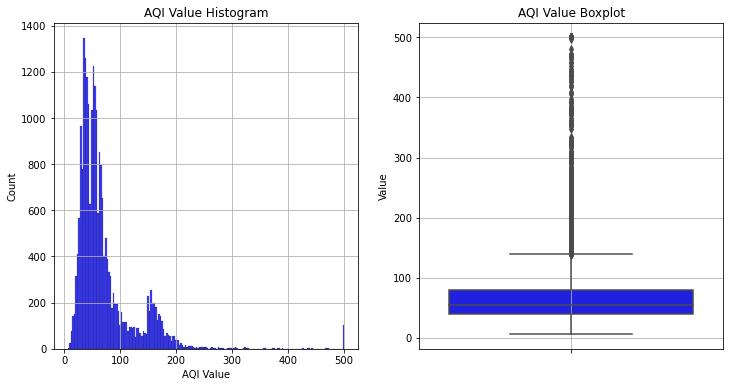

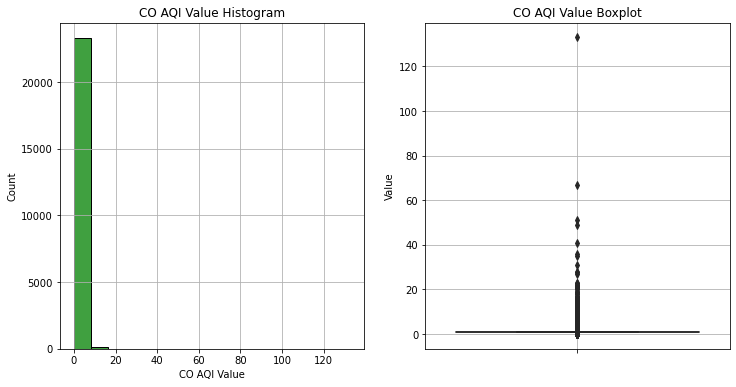

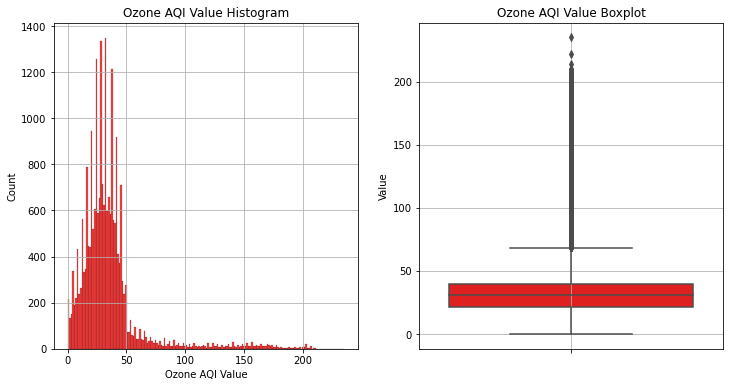

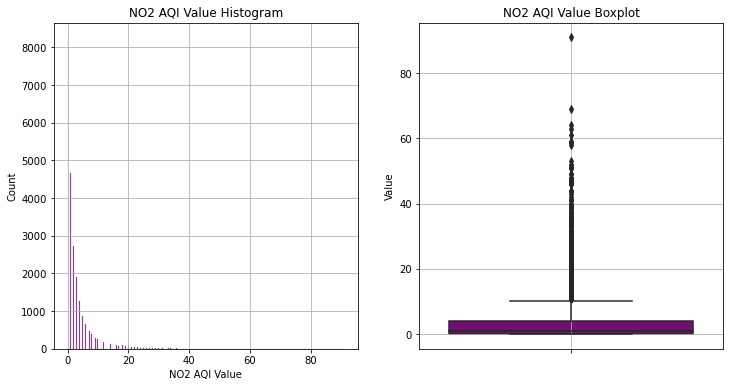

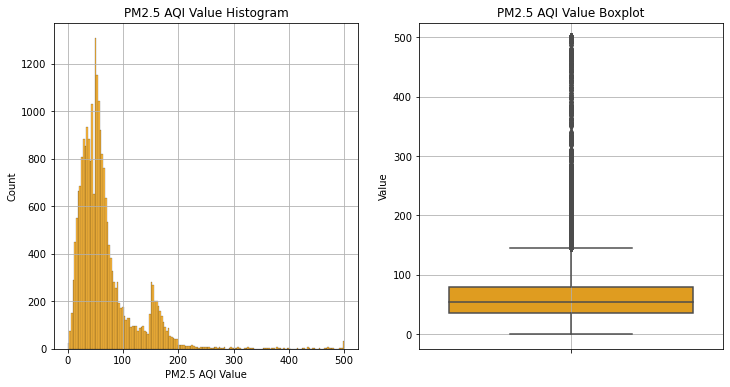

In [9]:
# Define a list of colors to use for the plots
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'pink']

# Loop over the columns of the DataFrame
for i, col in enumerate(df.select_dtypes(['float64', 'int64'])):
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
    
    # Create a histogram of the column in the first subplot
    sns.histplot(df[col], ax=axs[0], kde=False, color=colors[i % len(colors)])
    
    # Create a box plot of the column in the second subplot
    sns.boxplot(y=df[col], ax=axs[1], color=colors[i % len(colors)])
    
    # Set the titles of the subplots
    axs[0].set_title(f"{col} Histogram")
    axs[0].grid(True)
    axs[1].set_title(f"{col} Boxplot")
    axs[1].grid(True)
    # Set the y-axis label for the second subplot
    axs[1].set_ylabel('Value')
    
    # Show the figure
    plt.show()

In [105]:
# Group the data by country and aggregate the values for different AQI parameters
countries = (
    df.groupby('Country')
    .agg(
        avg_aqi_value=('AQI Value', 'median'),
        max_aqi_value=('AQI Value','max'),
        avg_co_aqi_value=('CO AQI Value', 'median'),
        max_co_aqi_value=('CO AQI Value', 'max'),
        avg_ozone_aqi_value=('Ozone AQI Value', 'median'),
        max_ozone_aqi_value=('Ozone AQI Value', 'max'),
        avg_no2_aqi_value=('NO2 AQI Value', 'median'),
        max_no2_aqi_value=('NO2 AQI Value', 'max'),
        avg_pm2_5_aqi_value=('PM2.5 AQI Value', 'median'),
        max_pm2_5_aqi_value=('PM2.5 AQI Value', 'max')
    )
)

# Show the aggregated data for each country
countries

,avg_aqi_value,max_aqi_value,avg_co_aqi_value,max_co_aqi_value,avg_ozone_aqi_value,max_ozone_aqi_value,avg_no2_aqi_value,max_no2_aqi_value,avg_pm2_5_aqi_value,max_pm2_5_aqi_value
Country,,,,,,,,,,
Afghanistan,87.0,198,1.0,2,41.0,64,0.0,1,87.0,198
Albania,66.0,115,1.0,1,42.0,49,1.0,2,66.0,115
Algeria,82.5,164,1.0,10,40.0,117,1.0,69,72.0,164
Andorra,29.0,32,1.0,1,29.0,32,0.0,0,22.0,24
Angola,58.0,285,1.0,23,21.0,49,0.0,14,58.0,285
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),60.0,165,1.0,4,16.0,52,3.0,18,60.0,165
Viet Nam,69.0,194,2.0,10,32.0,194,1.0,22,69.0,179
Yemen,151.0,179,1.0,2,44.0,93,1.0,2,151.0,179


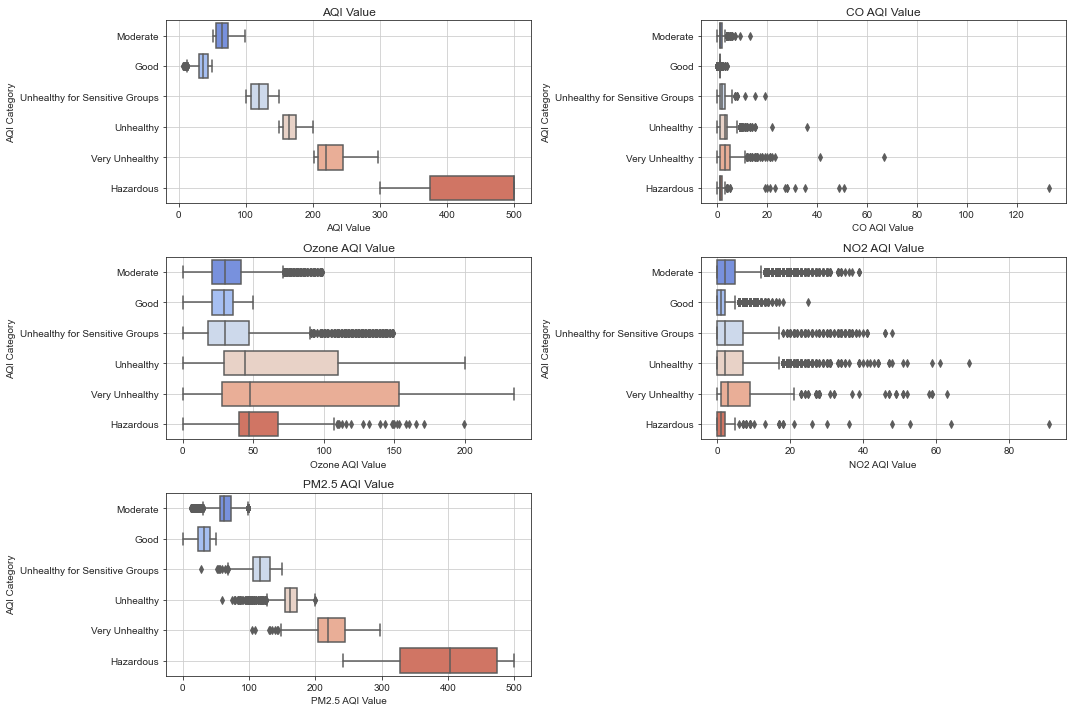

In [104]:
# columns to plot
columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# create a 3x2 subplot grid with given size
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.ravel()

# set seaborn style and palette
sns.set_style('ticks')
sns.set_palette('coolwarm')

# loop through each column and plot boxplot for AQI category
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, y='AQI Category', ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True)

# delete the last subplot
fig.delaxes(axes[-1])

# adjust subplot layout
plt.tight_layout()

# display the plot
plt.show()

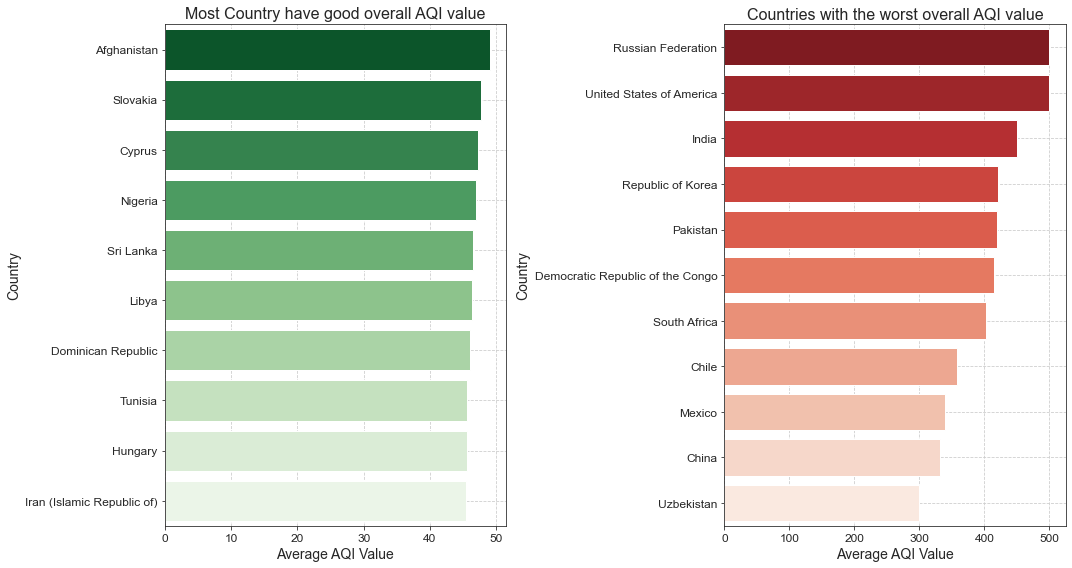

In [12]:
# Define the data sets
data_sets = [
    {'title': 'Most Country have good overall AQI value', 'color': 'Greens_r',
     'data': df[df['AQI Category'] == 'Good'].groupby('Country', as_index=False)['AQI Value'].mean().sort_values(by='AQI Value',ascending=False).head(10)},
    {'title': 'Countries with the worst overall AQI value', 'color': 'Reds_r',
     'data': df[df['AQI Category'] == 'Hazardous'].groupby('Country', as_index=False)['AQI Value'].mean().sort_values(by='AQI Value', ascending=False)}
]

# Create the subplots
fig, axs = plt.subplots(ncols=len(data_sets), figsize=(15, 8))

# Loop through the data sets and create the corresponding graph for each set
for i, data in enumerate(data_sets):
    sns.barplot(x='AQI Value', y='Country', data=data['data'], palette=data['color'], ax=axs[i])
    axs[i].set_title(data['title'], fontsize=16)
    axs[i].set_xlabel('Average AQI Value', fontsize=14)
    axs[i].set_ylabel('Country', fontsize=14)
    axs[i].tick_params(labelsize=12)
    axs[i].grid(linestyle='--')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

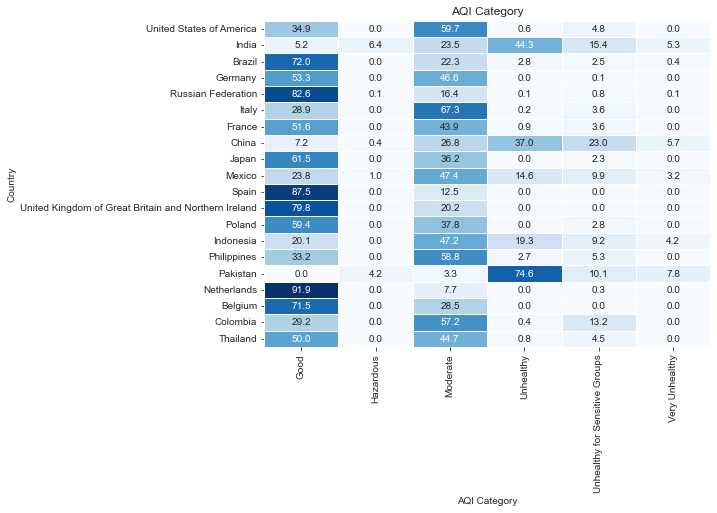

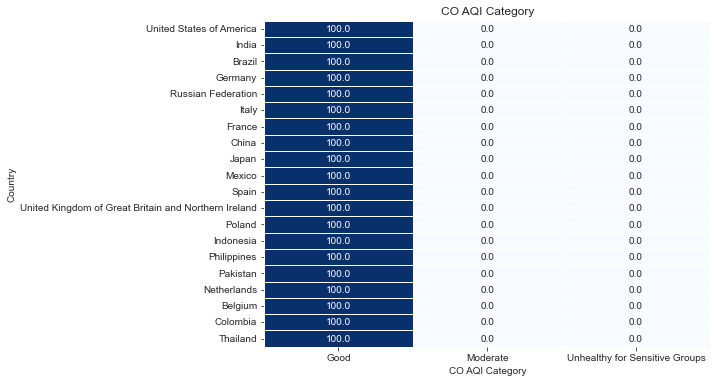

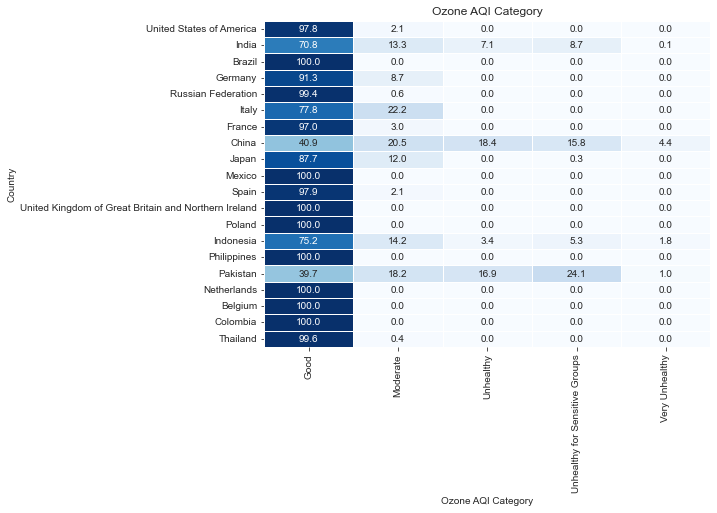

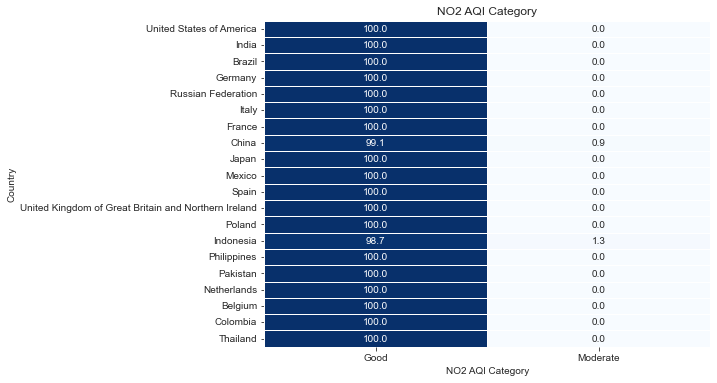

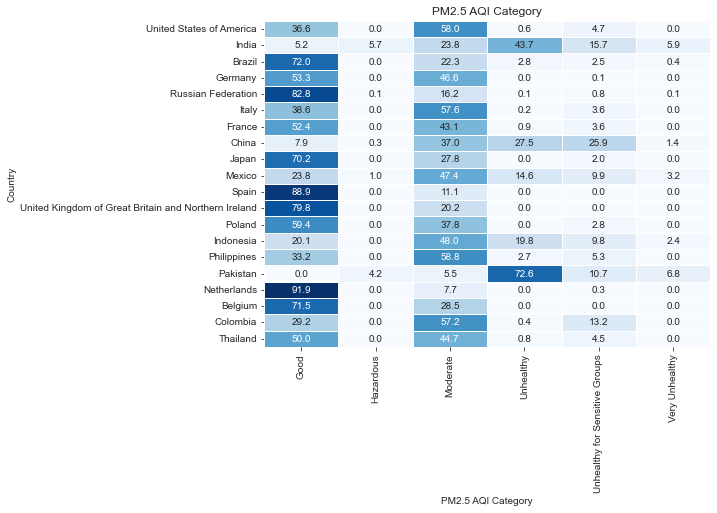

In [108]:
# Define the columns to process
cols = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category' ]

# Loop over each column
for col in cols:
    # Create a pivot table
    pivot = pd.pivot_table(df, 
                           index=['Country'], 
                           columns=[col], 
                           aggfunc='size', 
                           fill_value=0)

    # Select the top countries by the total count of cities
    top_countries = df['Country'].value_counts().head(20).index

    # Calculate the percentages for each cell
    percentages = pivot.loc[top_countries].apply(lambda x: x/x.sum()*100, axis=1)

    # Create a heatmap using seaborn
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(percentages, annot=True, cmap="Blues", fmt='.1f', linewidths=.5, cbar=False)

    # Customize the heatmap
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Country')
    
    # Show the plot
    plt.show()

India and China have the highest percentage of locations with unhealthy air quality, while Indonesia and Mexico have more 'good' areas. Spain has the best air quality with no locations marked as risky. No country has locations marked as hazardous for carbon monoxide, and the USA has the fewest 'moderate' areas. China has the worst ground-level ozone conditions, but over 60% of areas are within normal limits. India has the most 'good' locations for this category. Brazil, Mexico, Philippines, Poland, and the UK have all locations marked as 'Good' for ground-level ozone. Indonesia and China have relatively worse nitrogen dioxide conditions, with the USA having the fewest 'moderate' areas. India, China, Indonesia, and Mexico have the worst atmospheric particulate matter conditions, with less than one-third of Indian locations being 'Good' to 'Moderate'.

<AxesSubplot:>

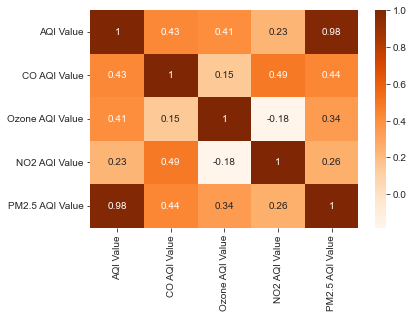

In [93]:
#Create a heatmap of the correlation matrix using Seaborn's heatmap function

sns.heatmap(df.corr(), annot=True, cmap="Oranges")


A Pearson correlation coefficient of 0.984 indicates a very strong positive correlation between AQI Value and PM2.5 AQI Value. This suggests that as the AQI Value increases, so does the PM2.5 AQI Value, and vice versa. The correlation coefficient value of 0.984 is very close to 1, which suggests that the relationship between these two variables is almost perfectly linear.

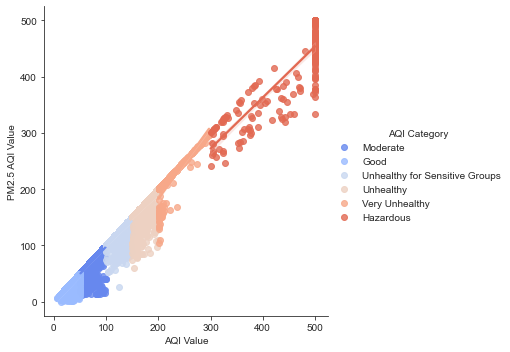

In [99]:
sns.lmplot(data=df,y='PM2.5 AQI Value',x='AQI Value',hue="AQI Category");


Pente : 0.9622225325525673
Ordonnée à l'origine : -0.7707254399703629
Coefficient de corrélation de Pearson : 0.9843265891583604
P-value : 0.0


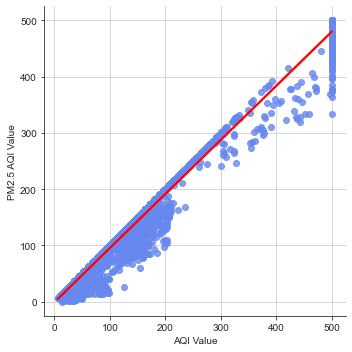

In [98]:
import scipy.stats as stats

# datas
x = df["AQI Value"]
y = df["PM2.5 AQI Value"]

# regression linear computing
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# displaying results
print("Pente :", slope)
print("Ordonnée à l'origine :", intercept)
print("Coefficient de corrélation de Pearson :", r_value)
print("P-value :", p_value)

# plots
sns.lmplot(data=df, y="PM2.5 AQI Value", x="AQI Value", line_kws={"color": "red"});
plt.grid(True)
plt.show()